<a href="https://colab.research.google.com/github/drishti-s1/Brain-Tumor-Detection-Model/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d jakeshbohaju/brain-tumor

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive_2.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive_31.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/archive_2/train',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
    )

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/archive_2/validation',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
    )

Found 158 files belonging to 2 classes.
Found 95 files belonging to 2 classes.


Found 1713 files belonging to 2 classes.
Found 976 files belonging to 2 classes.


In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/archive_3/train',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
    )

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/archive_3/validation',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
    )

Found 1792 files belonging to 2 classes.
Found 1208 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
56/56 [==============================] - 22s 139ms/step - loss: 1.5343 - accuracy: 0.7891 - val_loss: 15.8355 - val_accuracy: 0.5265
Epoch 2/10
56/56 [==============================] - 8s 143ms/step - loss: 0.2379 - accuracy: 0.9230 - val_loss: 16.3901 - val_accuracy: 0.5265
Epoch 3/10
56/56 [==============================] - 8s 135ms/step - loss: 0.1029 - accuracy: 0.9593 - val_loss: 13.6828 - val_accuracy: 0.5041
Epoch 4/10
56/56 [==============================] - 9s 150ms/step - loss: 0.0513 - accuracy: 0.9805 - val_loss: 11.8291 - val_accuracy: 0.5083
Epoch 5/10
56/56 [==============================] - 8s 140ms/step - loss: 0.0630 - accuracy: 0.9727 - val_loss: 12.7294 - val_accuracy: 0.4959
Epoch 6/10
56/56 [==============================] - 8s 129ms/step - loss: 0.0967 - accuracy: 0.9760 - val_loss: 5.3654 - val_accuracy: 0.4578
Epoch 7/10
56/56 [==============================] - 11s 186ms/step - loss: 0.1072 - accuracy: 0.9727 - val_loss: 0.5101 - val_accuracy: 0.8485

In [ ]:
model.evaluate(validation_ds )

38/38 [==============================] - 2s 48ms/step - loss: 0.8786 - accuracy: 0.8377


[0.8786357641220093, 0.8377483487129211]

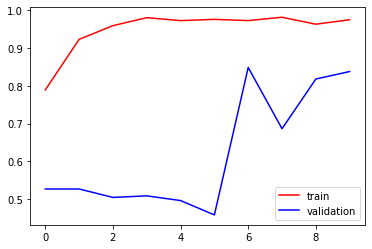

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

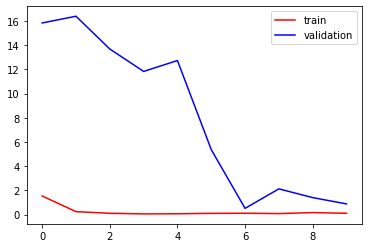

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save("./Model.h5")

In [ ]:
import cv2
import pandas as pd

import skimage
from random import randint
import numpy as np
import PIL
import matplotlib.pyplot as plt


In [ ]:
Image= cv2.imread('/content/archive_2/train/Image1.jpg')

In [ ]:
image=PIL.Image.open('/content/archive_2/train/Image1.jpg')
image_array= np.array(image)
float_array = image_array.astype(np.float32)
print(image_array)
print(float_array.dtype)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
float32


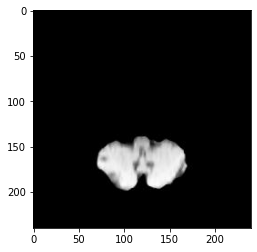

In [ ]:
plt.imshow(Image)


In [ ]:
Image.shape

(240, 240, 3)

In [ ]:
Image = cv2.resize(Image,(256,256))

In [ ]:
test_input = Image.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 249ms/step


array([[0.]], dtype=float32)

In [ ]:
Image= cv2.imread('/content/archive_2/train/Image3.jpg')

In [ ]:
image1=PIL.Image.open('/content/archive_2/train/Image3.jpg')
image1_array= np.array(image1)
float_array = image_array.astype(np.float32)
print(image1_array)
print(float_array.dtype)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
float32


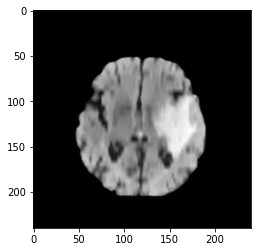

In [ ]:
plt.imshow(Image)

In [ ]:
Image.shape

(240, 240, 3)

In [ ]:
Image = cv2.resize(Image,(256,256))


In [ ]:
test_input = Image.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)